# Exoplanet Detection Model-

In [66]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Data Loading-
We used the kaggle test and train datasets, which can be found here(https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data)

In [67]:
train_df = pd.read_csv('exoTrain.csv')
test_df = pd.read_csv('exoTest.csv')

In [68]:
test_df.head()


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [69]:
train_df.head()


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [70]:
train_df.shape

(5087, 3198)

#### Examining the Training Set for any missing values-

In [71]:
train_df.isnull().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

In [72]:
train_df.isna().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

**There are much too many columns to manually fill in the blanks. Make a function that automatically checks for missing values.**

In [73]:
count_miss_values = 0
for column in train_df.columns:
    for item in train_df[column].isnull():
        if item == True:
            count_miss_values += 1
            
count_miss_values

0

**The training set has no missing data.**

In [74]:
# First Star In The Dataset
star0 = train_df.iloc[0, :]
star0.head()

LABEL      2.00
FLUX.1    93.85
FLUX.2    83.81
FLUX.3    20.10
FLUX.4   -26.98
Name: 0, dtype: float64

## Plotting (Lines And Scatter Plots)-
For two stars labelled 1 and two stars labelled2, making scatter plots and line plots.

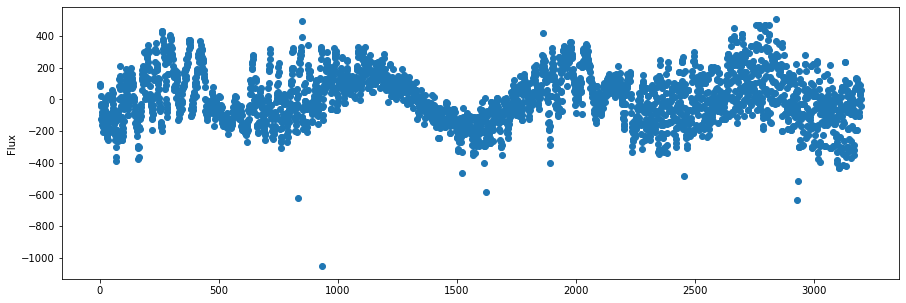

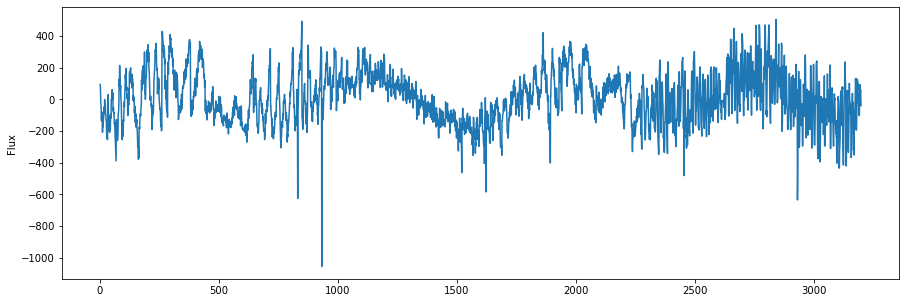

In [75]:
# Scatter Plot For First Star
plt.figure(figsize=(15, 5))
plt.scatter(pd.Series([i for i in range(1, len(star0))]), star0[1:])
plt.ylabel('Flux')
plt.show()
# Line Plot For First Star
plt.figure(figsize=(15, 5))
plt.plot(pd.Series([i for i in range(1, len(star0))]), star0[1:])
plt.ylabel('Flux')
plt.show()

**For the first star, there is a period fluctuation in the Flux values. This indicates that at least one planet orbits the star.**

In [76]:
# Second Star
star1 = train_df.iloc[1, :]
star1.head()

LABEL      2.00
FLUX.1   -38.88
FLUX.2   -33.83
FLUX.3   -58.54
FLUX.4   -40.09
Name: 1, dtype: float64

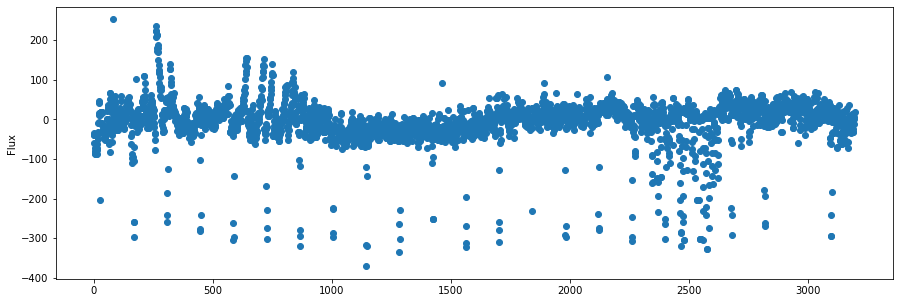

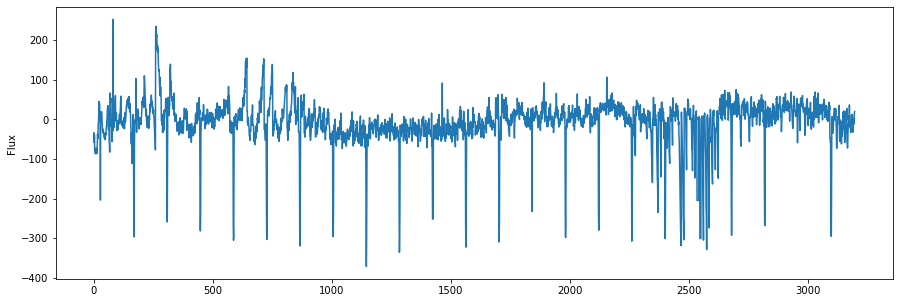

In [77]:
# Scatter Plot For Second Star
plt.figure(figsize=(15, 5))
plt.scatter(pd.Series([i for i in range(1, len(star1))]), star1[1:])
plt.ylabel('Flux')
plt.show()
# Line Plot For Second Star
plt.figure(figsize=(15, 5))
plt.plot(pd.Series([i for i in range(1, len(star1))]), star1[1:])
plt.ylabel('Flux')
plt.show()

**The flux data show a definite period fluctiona. This also establishes the existence of at least one planet around the Star.**

In [78]:
train_df.tail()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55
5086,1,323.28,306.36,293.16,287.67,249.89,218.30,188.86,178.93,118.93,...,71.19,0.97,55.20,-1.63,-5.50,-25.33,-41.31,-16.72,-14.09,27.82


In [79]:
# Last Star
star5086 = train_df.iloc[5086, :]
star5086.head()

LABEL       1.00
FLUX.1    323.28
FLUX.2    306.36
FLUX.3    293.16
FLUX.4    287.67
Name: 5086, dtype: float64

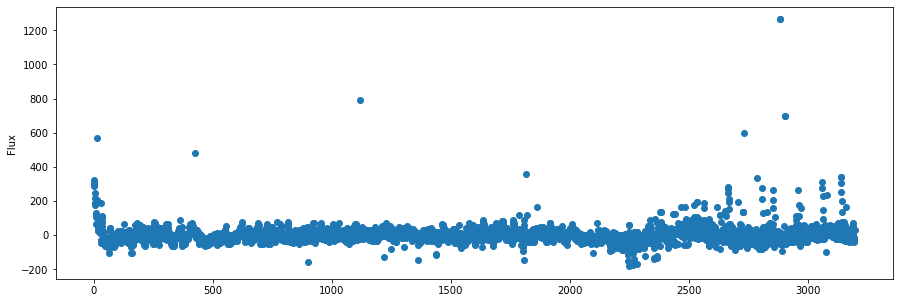

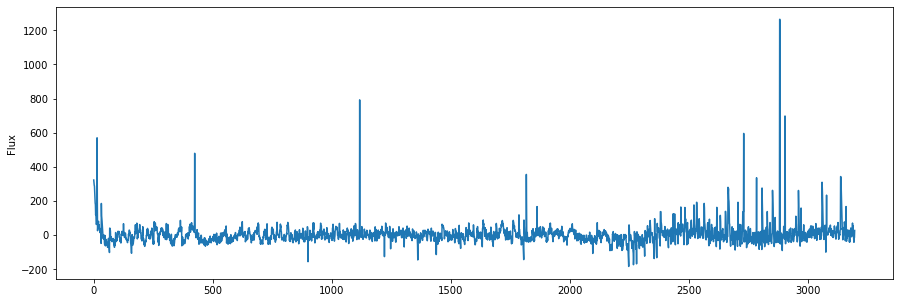

In [80]:
# Scatter Plot For Last Star
plt.figure(figsize=(15, 5))
plt.scatter(pd.Series([i for i in range(1, len(star5086))]), star5086[1:])
plt.ylabel('Flux')
plt.show()

# Line Plot For Last Star
plt.figure(figsize=(15, 5))
plt.plot(pd.Series([i for i in range(1, len(star5086))]), star5086[1:])
plt.ylabel('Flux')
plt.show()

**In the scatter plot, there is no clear periodic fluctuation. As a result, we can't be certain whether or not the star has a planet. There is no visible periodic fluctuation in the light intensity data, even after checking the line plot.**

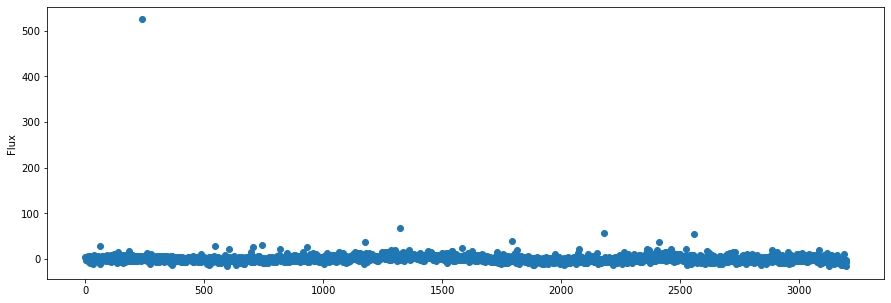

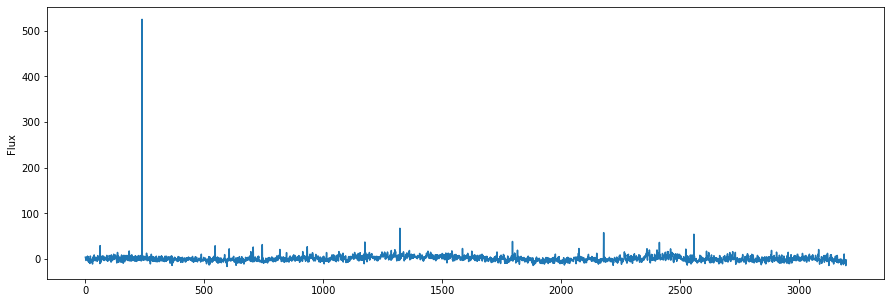

In [81]:
# Second-Last Star
star5085 = train_df.iloc[5085, :]

# Scatter Plot For Second-Last Star
plt.figure(figsize=(15, 5))
plt.scatter(pd.Series([i for i in range(1, len(star5085))]), star5085[1:])
plt.ylabel('Flux')
plt.show()

# Line Plot For Second-Last Star
plt.figure(figsize=(15, 5))
plt.plot(pd.Series([i for i in range(1, len(star5085))]), star5085[1:])
plt.ylabel('Flux')
plt.show()

# Random Forest Classifier (RFC)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [83]:
# Split the dataframe into feature variables and the target variable.
x_train = train_df.iloc[:, 1:]
x_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [84]:
y_train = train_df.iloc[:, 0]
y_train.head()

0    2
1    2
2    2
3    2
4    2
Name: LABEL, dtype: int64

In [85]:
rf_clf1 = RandomForestClassifier(n_jobs=-1)
rf_clf1.fit(x_train, y_train)
rf_clf1.score(x_train, y_train)

1.0

**The model has a staggering accuracy of 100% in fitting the dataset. This is most certainly an example of overfitting.**

In [86]:
x_test = test_df.iloc[:, 1:]
x_test.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,5458.80,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,-679.56,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,14.62,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [87]:
y_test = test_df.iloc[:, 0]
y_test.head()

0    2
1    2
2    2
3    2
4    2
Name: LABEL, dtype: int64

In [88]:
y_test.shape

(570,)

In [89]:
y_predicted = rf_clf1.predict(x_test)
y_predicted.shape

(570,)

In [90]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[565,   0],
       [  5,   0]], dtype=int64)

In [91]:
y_predicted = pd.Series(y_predicted)
y_predicted.value_counts()

1    570
dtype: int64

In [92]:
y_test.value_counts()

1    565
2      5
Name: LABEL, dtype: int64

In [93]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



C:\Users\OS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
accuracy_score(y_test, y_predicted)

0.9912280701754386